# 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Read the data as a data frame

In [2]:
data_orig = pd.read_csv('bank-full.csv')

data_orig.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Print the descriptive statistics of each & every column using describe() function

In [3]:
data_orig.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# 3. EDA

### 3.1 Shape of the data

In [ ]:
print (data.shape)

### 3.2 Data type of each attribute

In [ ]:
data.dtypes

### 3.3 Checking the presence of missing values

In [ ]:
# Check for missing value
data.isna().sum()

### We see that there no missing values in the dataset. However we would need to do closer inspection to see if there are dummy values
### in the dataset.

### 3.4 Five point summary of numerical attributes

In [73]:
def print_five_point_summary(feature, feature_name, do_print=True):
    median = np.median(feature)
    
    sorted_feature_data = sorted(feature)
    q1, q3= np.percentile(sorted_feature_data,[25,75])

    min_value = np.min(sorted_feature_data)
    max_value = np.max(sorted_feature_data)

    if do_print:
        print ('\nPrinting 5 point summary for %s'%(feature_name))
        print ('-----------------------------------')
        print ('\nMax value of %s is %d'%(feature_name, max_value))
        print ('Min value of %s is %d'%(feature_name, min_value))
        print ('Median value of %s is %d'%(feature_name, median))
        print ('1st Quartile value of %s is %d'%(feature_name, q1))
        print ('3rd Quartile value of %s is %d'%(feature_name, q3))

    five_point_summary = {'median':median,
                         'q1':q1,
                         'q3':q3,
                         'minvalue':min_value,
                         'max_value':max_value}
    return five_point_summary

In [74]:
for col in data.columns:
    if (data[col].dtype == 'int64' or data[col].dtype == 'float64'):
        print_five_point_summary(data[col], col)


Printing 5 point summary for age
-----------------------------------

Max value of age is 70
Min value of age is 18
Median value of age is 39
1st Quartile value of age is 33
3rd Quartile value of age is 48

Printing 5 point summary for balance
-----------------------------------

Max value of balance is 10483
Min value of balance is -6847
Median value of balance is 425
1st Quartile value of balance is 66
3rd Quartile value of balance is 1330

Printing 5 point summary for day
-----------------------------------

Max value of day is 31
Min value of day is 1
Median value of day is 16
1st Quartile value of day is 8
3rd Quartile value of day is 21

Printing 5 point summary for duration
-----------------------------------

Max value of duration is 4918
Min value of duration is 0
Median value of duration is 179
1st Quartile value of duration is 103
3rd Quartile value of duration is 318

Printing 5 point summary for campaign
-----------------------------------

Max value of campaign is 63
Min

### 3.5 Checking the presence of outliers

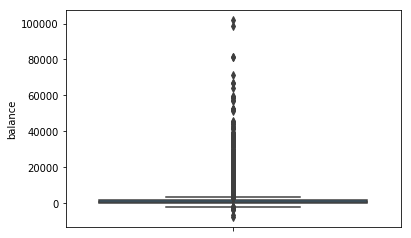

In [4]:
sns.boxplot(data_orig['balance'], orient='v')

## We see that the balance feature has quite a lot of outlier values. We would need to get a count of these outliers
## and if it's not a significant count we will remove those outliers

In [10]:
from scipy.stats import zscore

def remove_outliers (df, feature_name):
    
    rows_before = df.shape[0]
    
    feature_name_zscore = feature_name+'_zscore'
    
    df[feature_name_zscore] = zscore(df[feature_name])
    condition = (df[feature_name_zscore]>3) | (df[feature_name_zscore]<-3)
    df = df.drop(df[condition].index, axis=0, inplace=False)
    df = df.drop([feature_name_zscore], axis=1)
    
    rows_after = df.shape[0]
    
    print ('Number of rows which had outlier value for %s are %d'%(feature_name, (rows_before-rows_after)))
    sns.boxplot(df[feature_name], orient='v')
    
    return df

Number of rows which had outlier value for balance are 745


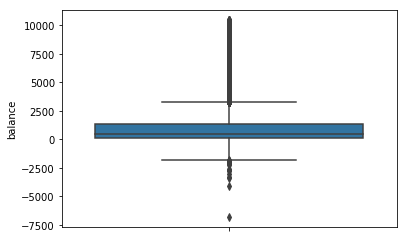

In [12]:
data = remove_outliers(data_orig, 'balance')

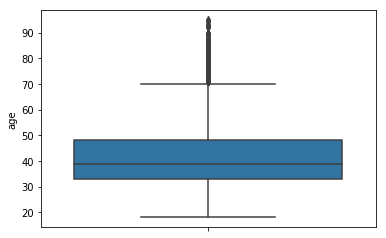

In [15]:
sns.boxplot(data_orig['age'], orient='v')

## We see that the age feature has few outlier values. We would need to get a count of these outliers
## and if it's not a significant count we will remove those outliers

Number of rows which had outlier value for age are 0


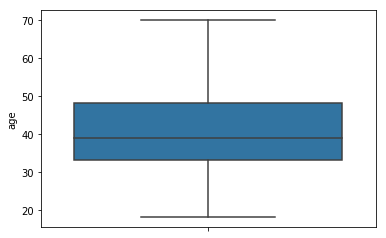

In [17]:
data = remove_outliers(data, 'age')

### 3.5.1 Relationship betwee Features

#### 3.5.1 Relationship between Number of Calls , Duration of Calls & Outcome of Marketing Campaign

Text(0.5, 1.0, 'Relationship b/w Number of calls & Duration of calls')

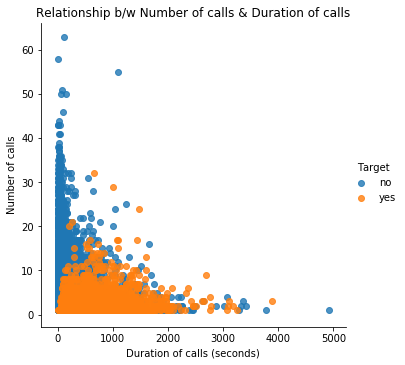

In [20]:
sns.lmplot(x='duration',y='campaign',hue='Target', data=data, fit_reg=False)
plt.xlabel('Duration of calls (seconds)')
plt.ylabel('Number of calls')
plt.title('Relationship b/w Number of calls & Duration of calls')

## Graph below indicates when the duration of call is smaller and frequency is higher, chances of cliens accepting are high')

#### 3.5.1 Relationship between Number of Previous Contacts , Age & Outcome of Marketing Campaign

Text(0.5, 1.0, 'Relationship b/w Age, Number of Previous contacts & client acceptance')

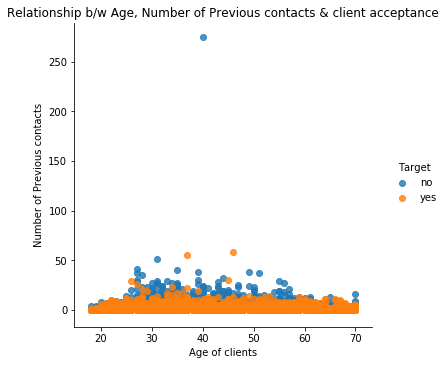

In [28]:
sns.lmplot(x='age',y='previous',hue='Target', data=data, fit_reg=False)
plt.xlabel('Age of clients')
plt.ylabel('Number of Previous contacts')
plt.title('Relationship b/w Age, Number of Previous contacts & client acceptance')

## Graph below indicates across all age groups, when the number of previous contacts is lesser before thir compaign, chances
## of client's accepting are high

#### 3.5.1 Breakup Analysis of Marketing Campaign Acceptance/Rejection by Customer Age groups

    We find that majority of people approached for marketing campaign where either young (<35 years) or middle age (<55 years) old. 

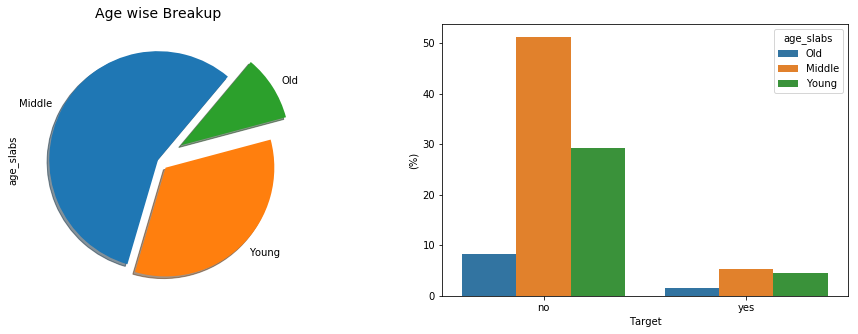

In [70]:
def get_age_slabs(annual_inc):
    if annual_inc < 35 :
        return 'Young'
    elif annual_inc > 55:
        return 'Old'
    else :
        return 'Middle'
        
data["age_slabs"] = data['age'].apply(get_age_slabs)

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Age wise Breakup", fontsize=14)
data["age_slabs"].value_counts().plot.pie(explode=[0,0.1,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Target", y="age", hue="age_slabs", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

Mean age of people who accepted loan  40.10149313962873
Mean age of people who rejected loan  40.10149313962873


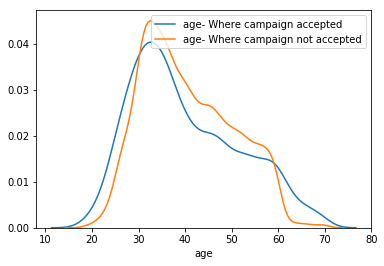

Mean balance of people who accepted loan  1397.893664245359
Mean balance of people who rejected loan  1397.893664245359


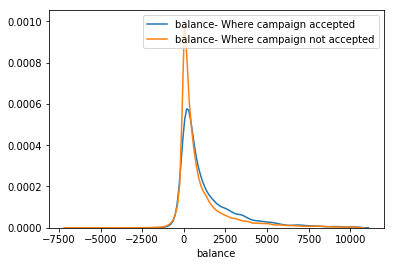

In [77]:
def compare_one_feature_with_loan_acceptance(comparative_feature):
    campaign_accepted = data[data['Target']=='yes']
    campaign_accepted_df = pd.DataFrame(data=campaign_accepted)

    campaign_rejected = data[data['Target']=='no']
    campaign_rejected_df = pd.DataFrame(data=campaign_rejected)

    mean_where_campaign_accepted = np.mean(campaign_accepted[comparative_feature])
    mean_where_campaign_not_accepted = np.mean(campaign_accepted_df[comparative_feature])

    print ('Mean '+comparative_feature +' of people who accepted loan ', mean_where_campaign_accepted)
    print ('Mean '+comparative_feature +' of people who rejected loan ', mean_where_campaign_not_accepted)

    sns.distplot(campaign_accepted_df[comparative_feature], hist=False, label=comparative_feature+ '- Where campaign accepted')
    sns.distplot(campaign_rejected_df[comparative_feature], hist=False, label=comparative_feature+ '- Where campaign not accepted')
    plt.legend()
    plt.show()
    
compare_one_feature_with_loan_acceptance('age')
compare_one_feature_with_loan_acceptance('balance')

### 3.6 Understanding more about categorical variables

In [ ]:
job_type_counts = data['job'].value_counts()
print (job_type_counts)
#sns.barplot(job_type_counts.index, job_type_counts.values)

### Finding - Some of the data points have 'unknown' job type - TBC if this is acceptable or needs imputation

#### 3.5.1 Breakup Analysis of Marketing Campaign Acceptance/Rejection by Marital status

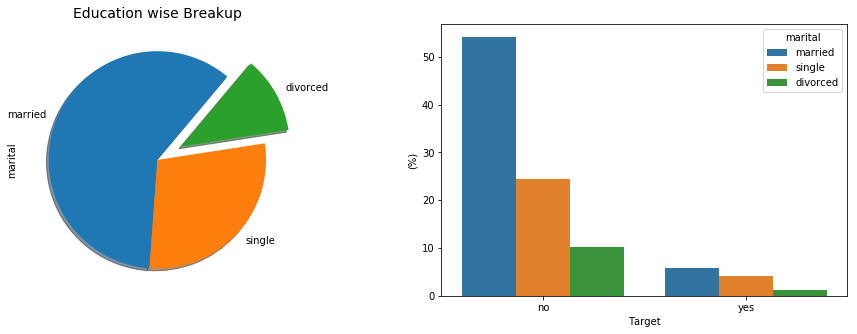

In [69]:
### Finding - All data points have valid marital status

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Education wise Breakup", fontsize=14)
data["marital"].value_counts().plot.pie(explode=[0,0,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Target", y="age", hue="marital", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

#### 3.5.1 Breakup Analysis of Marketing Campaign Acceptance/Rejection by Education Level

    We find that more people who rejected the marketing campaign had secondary education.

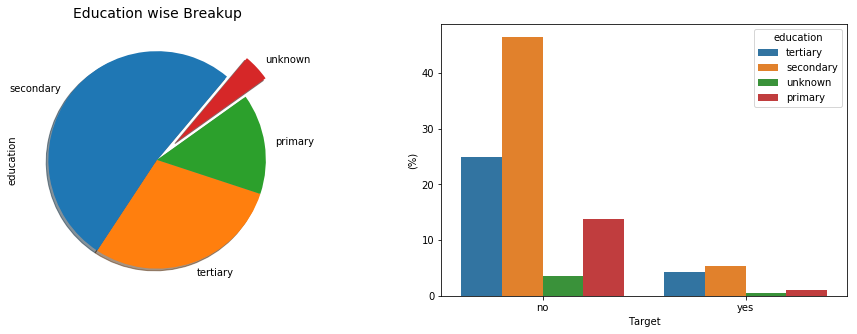

In [60]:
### Finding - Some of the data points have 'unknown' education type - This seems to be an acceptable value

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Education wise Breakup", fontsize=14)
data["education"].value_counts().plot.pie(explode=[0,0,0,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Target", y="age", hue="education", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

#### 3.5.1 Breakup Analysis of Marketing Campaign Acceptance/Rejection by Credit in default status

    We find that most people who were reached in campaign did not had any previous credits in default status.

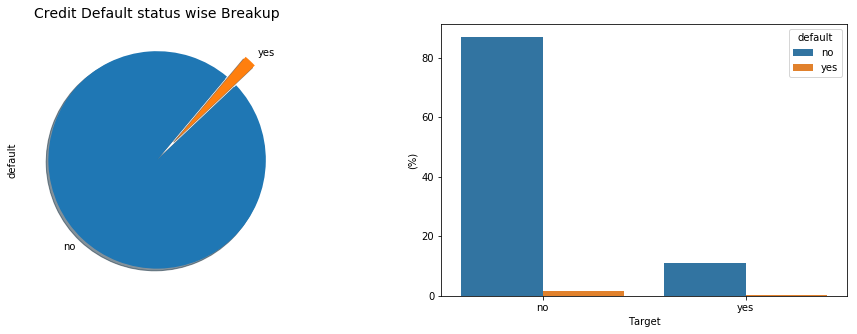

In [63]:
### Finding - All data points have valid values for 'default' feature

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Credit Default status wise Breakup", fontsize=14)
data["default"].value_counts().plot.pie(explode=[0,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Target", y="age", hue="default", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

#### 3.5.1 Breakup Analysis of Marketing Campaign Acceptance/Rejection by Housing Features (where client has housing loan)

    We find that more people who had housing loans rejected the marketing campaign - which makes sense as well 

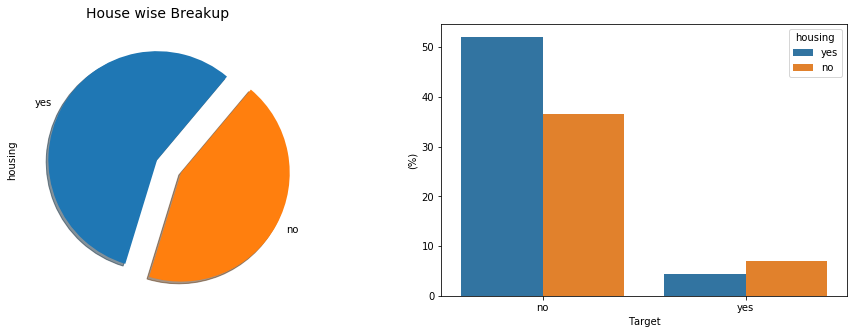

In [54]:
### Finding - All records have valid values for 'housing' feature

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("House wise Breakup", fontsize=14)
data["housing"].value_counts().plot.pie(explode=[0,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Target", y="age", hue="housing", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

#### 3.5.1 Breakup Analysis of Marketing Campaign Acceptance/Rejection by Loan Features (where client has Personal loan or not)

    We find that majority of people approached for marketing campaign did not had personal loan.

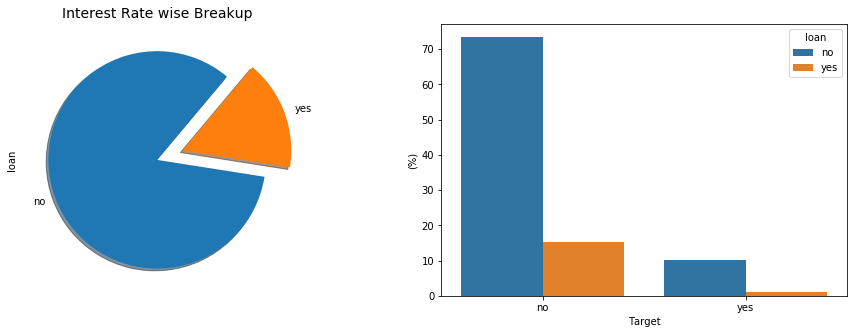

In [52]:
### Finding - All records have valid values for 'loan' feature

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Interest Rate wise Breakup", fontsize=14)
data["loan"].value_counts().plot.pie(explode=[0,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Target", y="age", hue="loan", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

In [ ]:
job_type_counts = data['contact'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

### Finding - Some of the records have 'unknown' contact type. 
### This isn't mentioned to be a valid value and hence we need to find a way to deal with it.
### For now we will go ahead and remove these rows.

In [ ]:
data['contact'].replace("unknown",np.nan, inplace=True)
data['contact'].dropna(inplace=True)

job_type_counts = data['contact'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

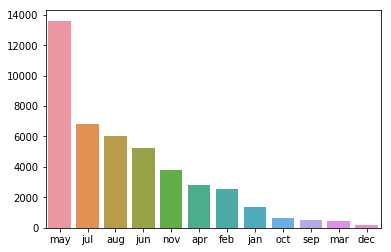

In [49]:
job_type_counts = data['month'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

### Finding - All records have valid values for 'month' feature

plt.show()

In [ ]:
job_type_counts = data['poutcome'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

### Finding - Some of the records have 'unknown' and 'other' poutcome. Feature documentation suggests that there should
### be three values of 'success', 'failure' and 'nonexistent', so we will convert accordingly.

In [ ]:
data['poutcome']=np.where(data['poutcome']=='unknown','nonexistent',data['poutcome'])
data['poutcome']=np.where(data['poutcome']=='other','nonexistent',data['poutcome'])

job_type_counts = data['poutcome'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

### 3.7 See the distribution of 'Class' variable and plot it using appropriate graph

In [ ]:
data.groupby('Target').agg({'Target':'count'})

### Finding -> We see that majority of people contact had not accepted the offer

## Finding Important Features Or Correlation Matrix with Heatmap

    - One of the ways we can find important features for this dataset is to plot a HeatMap which would show corerelation between each feature
   

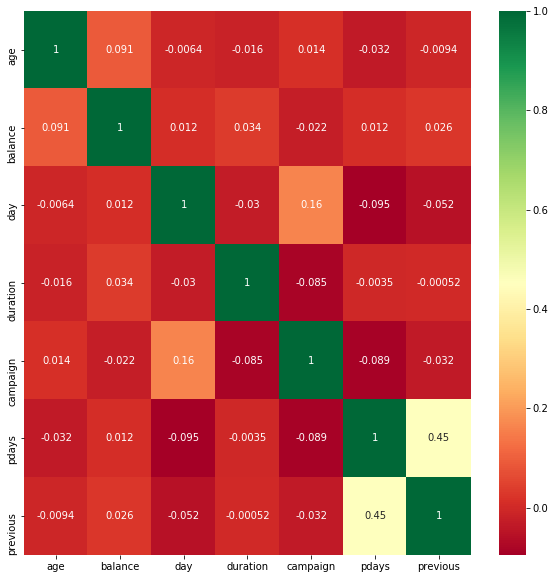

In [72]:
corelation_matrix = data.corr()
top_corelation_features = corelation_matrix.index
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corelation_features].corr(), annot=True, cmap='RdYlGn')

# 4. Prepare the data to train a model 

### 4.1 Get rid of the missing values

# 5. Standard Classification Algorithms Training & Evaluation

# 6. Ensemble Algorithms Training & Evaluation

# 7. Compare Performance of All Models